# Industrial Hygiene

```{seealso} Learning Outcomes
- Be able to apply the four key steps of industrial hygiene: Anticipation, Recognition, Evaluation, and Control for a given scenario.
- Calculate Time-Weighted Averages (TWA) for chemical exposures to determine compliance with safety standards.
- Evaluate workplace hazards including noise, thermal radiation, and chemical vapors using appropriate monitoring tools.
```

```{note} Reading
- Foundations of Spiritual and Physical Safety: with Chemical Processes; Chapter 6, Sec. 1
- Foundations of Spiritual and Physical Safety: with Chemical Processes; Chapter 7, Sec. 1
```

(industrialhygienists)=
## Industrial Hygienists

Industrial hygienists are typically part of the safety and health team in a company. They are responsible for identifying, evaluating, and controlling workplace hazards together with workers and management. 

```{figure} https://github.com/clint-bg/safetyinjc/blob/main/supportfiles/hygienist.jpeg?raw=true 
:width: 400px
:alt: Industrial Hygienist in Chemical Plant
:align: left
:label: Industrial Hygienist in Chemical Plant 1

Picture of an Industrial Hygienist in a Chemical Plant [https://images.app.goo.gl/EmTPJxCdSidwUoXQ6](https://images.app.goo.gl/EmTPJxCdSidwUoXQ6)

The four steps of industrial hygiene are:

1. **Anticipation**: Identifying potential hazards before they occur.
2. **Recognition**: Identifying hazards that are present.
3. **Evaluation**: Determining the magnitude of the exposure and the response.
4. **Control**: Implementing measures to control the hazards.

### Common Tools used by Industrial Hygienists

```{figure} https://github.com/clint-bg/safetyinjc/blob/main/supportfiles/htools.png?raw=true  
:width: 600px
:alt: Industrial Hygiene Tools
:align: left
:label: Industrial Hygiene Tools 1
Industrial Hygiene Tools
```

```{note}
The EH&S department together with Industrial Hygienists work to keep everyone safe. The safety team utilizes Process Safety Management (PSM) to identify and control hazards as we discussed in the previous lectures. However, it is important to remember that safety is everyone's responsibility. Some facilities have thousands of employees and only a few industrial hygienists. It is important to take responsibility for your own safety and work with the safety team.
```

## Quantifying Exposures

TWA, time-weighted average, is the most common way to quantify exposures. It is the exposure averaged over an 8-hour workday.

### Gases and Vapors

```{note}
Even if the exposure is longer than 8 hours, the TWA is still calculated over an 8-hour workday. For example, if a worker is exposed to a chemical for 12 hours, the TWA is calculated over 8 hours.
```

$$
\text{TWA} = \frac{\sum_{i=1}^{n} C_i \cdot T_i}{8} = \frac{1}{8} \int_{0}^{8} C(t) dt
$$

where $C_i$ is the concentration of the chemical at time $i$ and $T_i$ is the time the concentration is present. 

### Example Concentration Profile
| Time (hours) | Concentration (ppm) |
|--------------|---------------------|
| 0            | 0                   |
| 1            | 10                  |
| 2            | 15                  |
| 5            | 18                  |
| 6            | 20                  |
| 8            | 10                  |
| 9            | 30                  |
| 10           | 40                  |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

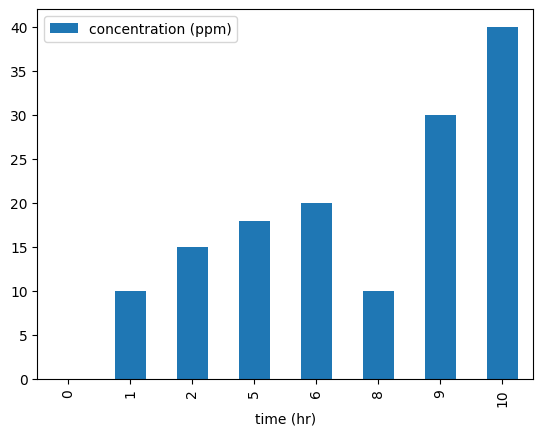

In [2]:
#example discrete concentration profile
data = {'time (hr)': [0, 1, 2, 5, 6, 8, 9, 10],
        'concentration (ppm)': [0,10,15,18,20,10,30,40]}
df = pd.DataFrame(data)
df.plot(x='time (hr)', y='concentration (ppm)', kind = 'bar')
plt.show()

In [3]:
#TWA Calculation; Method 1 (assume the current measure is the same for the previous interval)
TWA_1 = 0; ti_1 = 0;
#loop through each time interval
for i in range(1, len(df)):
    #calculate TWA for each interval
    C_i = df['concentration (ppm)'][i]
    t_i = df['time (hr)'][i]
    TWA_1 += C_i*(t_i-ti_1)
    ti_1 = t_i; 
print(f'TWA_1 = {TWA_1/8:.1f} ppm')

TWA_1 = 23.6 ppm


In [4]:
#TWA Calculation; Method 2 (use the trapezoidal rule)
TWA_trap = 0;
#loop through each time interval
for i in range(1, len(df)):
    #calculate TWA for each interval
    C_i = df['concentration (ppm)'][i]
    C_i_1 = df['concentration (ppm)'][i-1]
    t_i = df['time (hr)'][i]
    t_i_1 = df['time (hr)'][i-1]
    TWA_trap += (C_i+C_i_1)*(t_i-t_i_1)/2
print(f'TWA_trap = {TWA_trap/8:.1f} ppm')

TWA_trap = 21.4 ppm


In [5]:
#TWA Calculation; Method 3 (fit a polynomial to the data and integrate with cspline1d_integral)
from scipy.interpolate import CubicSpline
#fit a polynomial to the data
cs = CubicSpline(df['time (hr)'], df['concentration (ppm)'])
#integrate the polynomial with quad
from scipy.integrate import quad
TWA_CSpline, err = quad(cs, 0, 10)
print(f'TWA_CSpline = {TWA_CSpline/8:.1f} ppm')

TWA_CSpline = 21.1 ppm


In [6]:
#fit a polynomial to the data
p = np.polyfit(df['time (hr)'], df['concentration (ppm)'], 3)
#integrate the polynomial
TWA_poly = quad(np.poly1d(p), 0, 10)[0]
print(f'TWA_poly = {TWA_poly/8:.1f} ppm')

TWA_poly = 22.1 ppm


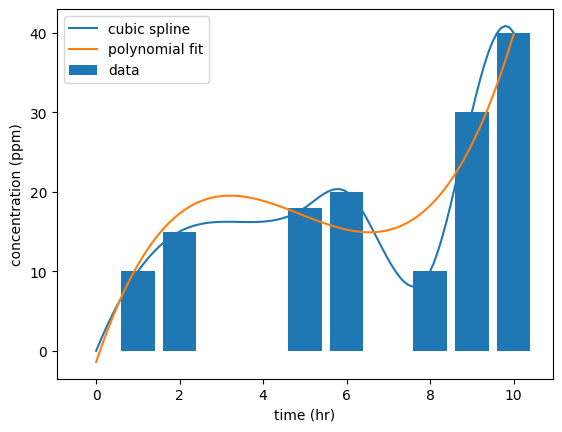

In [7]:
#plot the data and the polynomial fit
t = np.linspace(0, 10, 100)
C = np.poly1d(p)(t)
plt.plot(t, cs(t), label='cubic spline')
plt.plot(t, C, label = 'polynomial fit')
plt.bar(df['time (hr)'], df['concentration (ppm)'], label = 'data')
plt.xlabel('time (hr)')
plt.ylabel('concentration (ppm)')
plt.legend()
plt.show()

In [8]:
#tabular display of the results
print('Method\tTWA (ppm)')
print(f'1\t\t{TWA_1/8:.1f}')
print(f'trapezoid\t{TWA_trap/8:.1f}')
print(f'CSpline\t\t{TWA_CSpline/8:.1f}')
print(f'Polynomial_3\t{TWA_poly/8:.1f}')

Method	TWA (ppm)
1		23.6
trapezoid	21.4
CSpline		21.1
Polynomial_3	22.1


#### Was the worker over exposed?

If the TLV-TWA is 20 ppm for the above chemical, then YES, the worker was over exposed.

:::{admonition} Consequences of Overexposure
:class: warning
Overexposure to chemicals can cause a variety of health effects. Some chemicals can cause immediate effects such as dizziness, nausea, and headaches. Others can cause long-term effects such as cancer, reproductive issues, and organ damage. 

In order to prevent this scenario from happening again, the industrial hygienist would work with the safety team to implement control measures such as increased ventilation and the use of a respirator with a organic vapor cartridge for example. 
- Using a respiratory for long periods of time is not ideal

```{figure} https://github.com/clint-bg/safetyinjc/blob/main/supportfiles/resp.png?raw=true. 
:width: 300px
:alt: Respirator with Organic Vapor Cartridge
:align: left
:label: Respirator with Organic Vapor Cartridge
Respirator with Organic Vapor Cartridge
```

:::

### Multiple Gaseous Chemicals

What if there are multiple hazardous vapors present?

Overexposure can be determined by the below equation:

$$
\sum_{i=1}^{n} \frac{C_i}{\text{TLV-TWA}_i} > 1?
$$

The TLV-TWA for gaseous mixtures can be found by:

$$
\text{TLV-TWA}_{\text{mixture}} =  \frac{\sum_{i=1}^{n} C_i}{\sum_{i=1}^{n} \frac{C_i}{\text{TLV-TWA}_i}}
$$

```{note}
Once the mixture TLV-TWA is found, determining the exposure can be done using the same equation as before where the sum of the concentrations for each timeframe is summed and divided by 8 hours.
```

### Dusts

Dusts are treated the same way but instead of using ppm, mg/m^3 is used.

```{warning} Action Items
1. Convert 5 ppm to mg per cubic meter for H2S.
2. Calculate the 8-hr time weighted average (TWA) for the following exposure with time of 0, 1, 2, 5, 6, 8, 9, and 10 hrs and concentrations of 0, 10, 15, 18, 20, 10, 30, and 40 ppm. 
3. Personal Reflection: If the PEL for this chemical is 20 ppm and the chemical is used in the process, explain what actions you would recommend as a manager to ensure worker's safety.
```